# importing library

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import urllib 
from urllib import request
import requests
import re
import json
import pprint as pp
import os
import random
import seaborn as sns

# 가설

1. 순발식 전 기간의 포털 검색량과 순발식 순위는 상관이 있을 것이다.
2. 검색량 누적 상위 20명을 인기 연습생이라고 정의할 때, 방송 전과 후 인기 연습생은 다를 것이다.<br>
   또한 방송 후 검색량이 방송 전 검색량보다 1차 순발식 순위와 상관이 있을 것이다.(부제 : PD pick 의 진실)

# 가설 1 검증

1. 순발식 전 기간의 포털 검색량과 순발식 순위는 상관이 있을 것이다.

In [50]:
s1 = pd.read_csv('s1_rtTotal.csv', encoding = 'cp949', index_col = 0)
s2 = pd.read_csv('s2_rtTotal.csv', encoding = 'cp949', index_col = 0)

In [51]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin' :
    rc('font', family = 'Applegothic')
elif platform.system() == 'Windows' :
    path = 'c:/Window/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else : 
    print('Unknow system') 
    
# Mac OS matplotlib 한글 폰트 지원

In [42]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# Windows matplotlib 한글폰트 지원

## rt01과 1차 순발식

1. Season 1

In [52]:
coef_s1rt01 = np.corrcoef(s1['rank_1st_ep5'], s1['rt01_ratio'])
coef_s1rt01

array([[ 1.        , -0.53642623],
       [-0.53642623,  1.        ]])

In [53]:
out = s1[s1['rank_1st_ep5'] > 61] # 1차 순발식에서 방출된 연습생
vertical_range = out[out['rt01_ratio'] > 
                     int(s1[s1[
                              'rank_1st_ep5'] == 61 # 생존 마지막 순위
                           ]
                         ['rt01_ratio'].values)
                    ].sort_values(by = 'rt01_ratio', ascending = False).head(3) # 상위 3명
# 1차 순발식에서 방출된 연습생 중 생존 마지막 등수 연습생의 검색 ratio 보다 큰 ratio를 기록한 연습생 상위 3명
# 즉, 문 닫고 들어간 연습생보다 ratio가 높지만 탈락한 연습생들 중 상위 3명

vline = [vertical_range.index[0], 
         vertical_range.index[1], 
         vertical_range.index[2]]

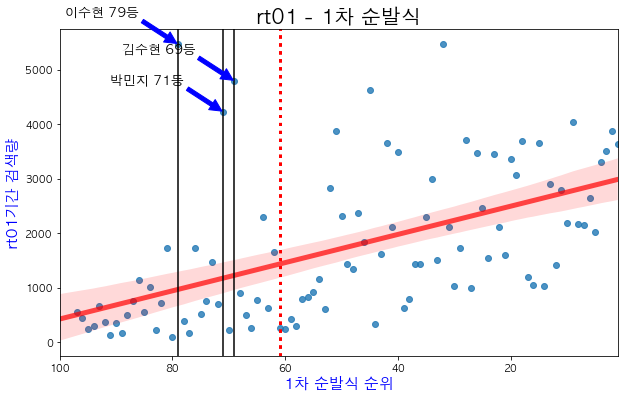

In [54]:
plt.figure(figsize=(10,6))



x = np.arange(1, 100, 20)
plt.xlim(100, 1) 

sns.regplot(x = s1['rank_1st_ep5'] , y = s1['rt01_ratio'], line_kws = {"color":"r","alpha":0.7,"lw":5})



for each in vline:
    name = s1['name'][each]
    rank = str(s1['rank_1st_ep5'][each])
    suffix = '등'
    total = name + ' ' + rank + suffix
    
    plt.axvline(x=s1['rank_1st_ep5'][each], color='black') # ratio 상위 3명 관련 axvline
    plt.annotate(total, xy=(s1['rank_1st_ep5'][each], s1['rt01_ratio'][each]), 
                 xytext=(s1['rank_1st_ep5'][each]+20, s1['rt01_ratio'][each]+500), size=13, 
                 arrowprops=dict(color='blue', shrink=0.03))
    
    plt.axvline(x = 61, color = 'red', linestyle=':', linewidth= 3) # 1차 순발식 생존 등수

plt.title('rt01 - 1차 순발식', fontsize = 20, fontweight = 'bold')
plt.xlabel('1차 순발식 순위', fontsize = 15, color = 'b')
plt.ylabel('rt01기간 검색량', fontsize = 15, color = 'b')

# plt.savefig('s1_rt01')

plt.show()

In [55]:
len(out[out['rt01_ratio'] > 
                     int(s1[s1[
                              'rank_1st_ep5'] == 61 # 생존 마지막 순위
                           ]
                         ['rt01_ratio'].values)
                    ])

28

- 상관분석을 통해 검색 ratio와 1차 순발식에서 생존은 상관이 꽤 높은 것으로 나왔다.
    - 상관계수는 0.53
- 61등의 검색 ratio보다 높지만 생존하지 못한 연습생은 28인데 그 중 상위 3명을 그래프에 표시했다.
     - 다만 이수현의 경우 동명이인으로 이수현A, B로 나뉘었는데 대중들은 검색을 이수현으로 하므로 둘의 검색 ratio가 합쳐졌고 매우 높은 ratio를 기록했다.
    - 이수현A는 탈락, 이수현B는 생존

2. Season 2

In [56]:
coef_s2rt01 = np.corrcoef(s2['rank_1st_ep5'], s2['rt01_ratio'])
coef_s2rt01

array([[ 1.        , -0.69561437],
       [-0.69561437,  1.        ]])

In [57]:
out = s2[s2['rank_1st_ep5'] > 60] # 1차 순발식에서 방출된 연습생
vertical_range = out[out['rt01_ratio'] > 
                     int(s1[s1[
                              'rank_1st_ep5'] == 60 # 생존 마지막 순위
                           ]
                         ['rt01_ratio'].values)
                    ].sort_values(by = 'rt01_ratio', ascending = False).head(3) # 상위 3명
# 1차 순발식에서 방출된 연습생 중 생존 마지막 등수 연습생의 검색 ratio 보다 큰 ratio를 기록한 연습생 상위 3명
# 즉, 문 닫고 들어간 연습생보다 ratio가 높지만 탈락한 연습생들 중 상위 3명

vline = [vertical_range.index[0], 
         vertical_range.index[1], 
         vertical_range.index[2]]

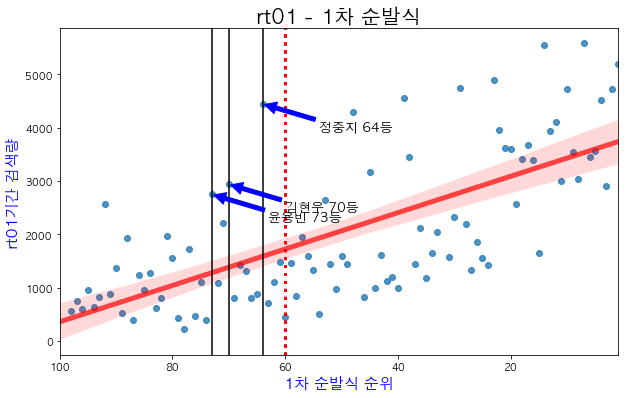

In [58]:
plt.figure(figsize=(10,6))

x = np.arange(1, 100, 20)
plt.xlim(100, 1) 

sns.regplot(x = s2['rank_1st_ep5'] , y = s2['rt01_ratio'], line_kws = {"color":"r","alpha":0.7,"lw":5})


for each in vline:
    name = s2['name'][each]
    rank = str(s2['rank_1st_ep5'][each])
    suffix = '등'
    total = name + ' ' + rank + suffix
    
    plt.axvline(x=s2['rank_1st_ep5'][each], color='black') # ratio 상위 3명 관련 axvline
    plt.annotate(total, xy=(s2['rank_1st_ep5'][each], s2['rt01_ratio'][each]), 
                 xytext=(s2['rank_1st_ep5'][each]-10, s2['rt01_ratio'][each]-500), size=13, 
                 arrowprops=dict(color='blue', shrink=0.03))
    
    plt.axvline(x = 60, color = 'red', linestyle=':', linewidth= 3) # 1차 순발식 생존 등수
    

plt.title('rt01 - 1차 순발식', fontsize = 20, fontweight = 'bold')
plt.xlabel('1차 순발식 순위', fontsize = 15, color = 'b')
plt.ylabel('rt01기간 검색량', fontsize = 15, color = 'b')

# plt.savefig('s2_rt01')
    
    
plt.show()

In [59]:
len(out[out['rt01_ratio'] > 
                     int(s1[s1[
                              'rank_1st_ep5'] == 61 # 생존 마지막 순위
                           ]
                         ['rt01_ratio'].values)
                    ])

37

- 상관분석을 통해 검색 ratio와 1차 순발식에서 생존은 상관이 꽤 높은 것으로 나왔다.
    - 상관계수는 0.69 (시즌1보다 조금 더 높다)
- 60등의 검색 ratio보다 높지만 생존하지 못한 연습생은 37명인데 그 중 상위 3명을 그래프에 표시했다.
     - 다만 정중지는 부정적인 논란이 있어 검색량이 많았고 탈락한 케이스

## rt02와 2차 순발식

1. Season 1

In [60]:
s1 = s1[s1['rank_1st_ep5']<=61] # 1차 순발식 탈락자는 이후 데이터가 없으므로 제외
coef_s1rt02 = np.corrcoef(s1['rank_2nd_ep8'], s1['rt02_ratio'])
coef_s1rt02

array([[ 1.        , -0.59129411],
       [-0.59129411,  1.        ]])

In [61]:
out = s1[s1['rank_2nd_ep8'] > 35] # 2차 순발식에서 방출된 연습생
vertical_range = out[out['rt02_ratio'] > 
                     int(s1[s1[
                              'rank_2nd_ep8'] == 35 # 생존 마지막 순위
                           ]
                         ['rt02_ratio'].values)
                    ].sort_values(by = 'rt02_ratio', ascending = False).head(3) # 상위 3명
# 즉, 문 닫고 들어간 연습생보다 ratio가 높지만 탈락한 연습생들 중 상위 3명

vline = [vertical_range.index[0], 
         vertical_range.index[1], 
         vertical_range.index[2]]

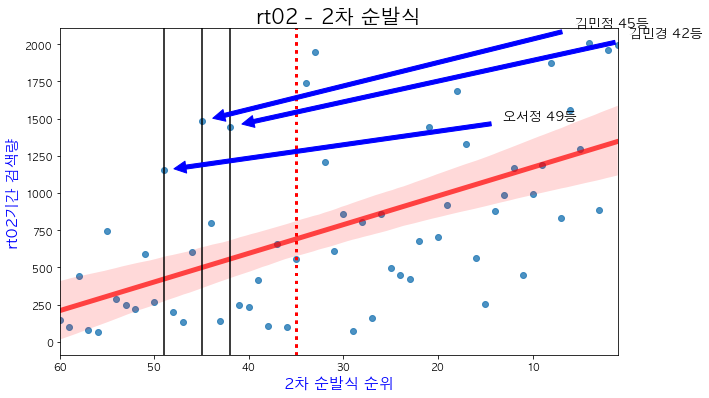

In [113]:
plt.figure(figsize=(10,6))

x = np.arange(1, 100, 20)
plt.xlim(60, 1) 

sns.regplot(x = s1['rank_2nd_ep8'] , y = s1['rt02_ratio'], line_kws = {"color":"r","alpha":0.7,"lw":5})


for each in vline:
    name = s1['name'][each]
    rank = str(int(s1['rank_2nd_ep8'][each]))
    suffix = '등'
    total = name + ' ' + rank + suffix
    
    plt.axvline(x=s1['rank_2nd_ep8'][each], color='black') # ratio 상위 3명 관련 axvline
    plt.annotate(total, xy=(s1['rank_2nd_ep8'][each], s1['rt02_ratio'][each]), 
                 xytext=(s1['rank_2nd_ep8'][each]*1.9-80, s1['rt02_ratio'][each]*1.9-700), size=13, 
                 arrowprops=dict(color='blue', shrink=0.03))
    
    plt.axvline(x = 35, color = 'red', linestyle=':', linewidth= 3) # 2차 순발식 생존 등수

plt.title('rt02 - 2차 순발식', fontsize = 20, fontweight = 'bold')
plt.xlabel('2차 순발식 순위', fontsize = 15, color = 'b')
plt.ylabel('rt02기간 검색량', fontsize = 15, color = 'b')

plt.savefig('s1_rt02')
    
plt.show()

In [114]:
len(out[out['rt02_ratio'] > 
                     int(s1[s1[
                              'rank_2nd_ep8'] == 35 # 생존 마지막 순위
                           ]
                         ['rt02_ratio'].values)
                    ])

8

- 상관분석을 통해 검색 rt02와 2차 순발식에서 생존은 상관이 꽤 높은 것으로 나왔다.
    - 상관계수는 0.59
- 35등의 검색 ratio보다 높지만 생존하지 못한 연습생은 8명인데 그 중 상위 3명을 그래프에 표시했다.

2.  Season 2

In [115]:
s2 = s2[s2['rank_2nd_ep8']<=61] # 1차 순발식 탈락자는 이후 데이터가 없으므로 제외
coef_s2rt02 = np.corrcoef(s2['rank_2nd_ep8'], s2['rt02_ratio'])
coef_s2rt02

array([[ 1.        , -0.81527804],
       [-0.81527804,  1.        ]])

In [116]:
out = s2[s2['rank_2nd_ep8'] > 35] # 2차 순발식에서 방출된 연습생
vertical_range = out[out['rt02_ratio'] > 
                     int(s2[s2[
                              'rank_2nd_ep8'] == 35 # 생존 마지막 순위
                           ]
                         ['rt02_ratio'].values)
                    ].sort_values(by = 'rt02_ratio', ascending = False).head(3) # 상위 3명
# 즉, 문 닫고 들어간 연습생보다 ratio가 높지만 탈락한 연습생들 중 상위 3명

vline = [vertical_range.index[0], 
         vertical_range.index[1], 
         vertical_range.index[2]]

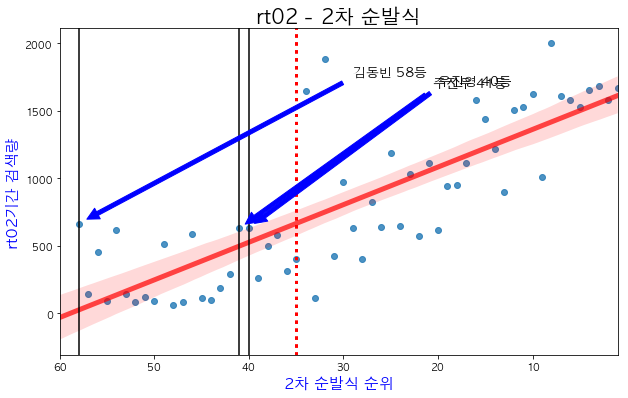

In [124]:
plt.figure(figsize=(10,6))

x = np.arange(1, 100, 20)
plt.xlim(60, 1) 

sns.regplot(x = s2['rank_2nd_ep8'] , y = s2['rt02_ratio'], line_kws = {"color":"r","alpha":0.7,"lw":5})


for each in vline:
    name = s2['name'][each]
    rank = str(int(s2['rank_2nd_ep8'][each]))
    suffix = '등'
    total = name + ' ' + rank + suffix
    
    plt.axvline(x=s2['rank_2nd_ep8'][each], color='black') # ratio 상위 3명 관련 axvline
    plt.annotate(total, xy=(s2['rank_2nd_ep8'][each], s2['rt02_ratio'][each]), 
                 xytext=(s2['rank_2nd_ep8'][each]*(0.5), s2['rt02_ratio'][each]*(2.5)+100), size=13, 
                 arrowprops=dict(color='blue', shrink=0.03))
    
    plt.axvline(x = 35, color = 'red', linestyle=':', linewidth= 3) # 2차 순발식 생존 등수
    
plt.title('rt02 - 2차 순발식', fontsize = 20, fontweight = 'bold')
plt.xlabel('2차 순발식 순위', fontsize = 15, color = 'b')
plt.ylabel('rt02기간 검색량', fontsize = 15, color = 'b')

plt.savefig('s2_rt02')
    
    
    
plt.show()

- 김동빈(58등), 주진우(41등), 우진영 (40등)

In [125]:
len(out[out['rt02_ratio'] > 
                     int(s2[s2[
                              'rank_2nd_ep8'] == 35 # 생존 마지막 순위
                           ]
                         ['rt02_ratio'].values)
                    ])

9

- 상관분석을 통해 검색 rt02와 2차 순발식에서 생존은 상관이 매우 높은 것으로 나왔다.
    - 상관계수는 0.81
- 35등의 검색 ratio보다 높지만 생존하지 못한 연습생은 9명인데 그 중 상위 3명을 그래프에 표시했다.

## rt03과 3차 순발식

1. Season 1

In [128]:
s1 = s1[s1['ep10_rank']<=35] # 2차 순발식 탈락자는 이후 데이터가 없으므로 제외
coef_s1rt03 = np.corrcoef(s1['ep10_rank'], s1['rt03_ratio'])
coef_s1rt03

array([[ 1.        , -0.49395313],
       [-0.49395313,  1.        ]])

In [129]:
out = s1[s1['ep10_rank'] > 22] # 3차 순발식에서 방출된 연습생
vertical_range = out[out['rt03_ratio'] > 
                     int(s1[s1[
                              'ep10_rank'] == 22 # 생존 마지막 순위
                           ]
                         ['rt03_ratio'].values)
                    ].sort_values(by = 'rt03_ratio', ascending = False).head(3) # 상위 3명
# 즉, 문 닫고 들어간 연습생보다 ratio가 높지만 탈락한 연습생들 중 상위 3명

vline = [vertical_range.index[0], 
         vertical_range.index[1], 
         vertical_range.index[2]]

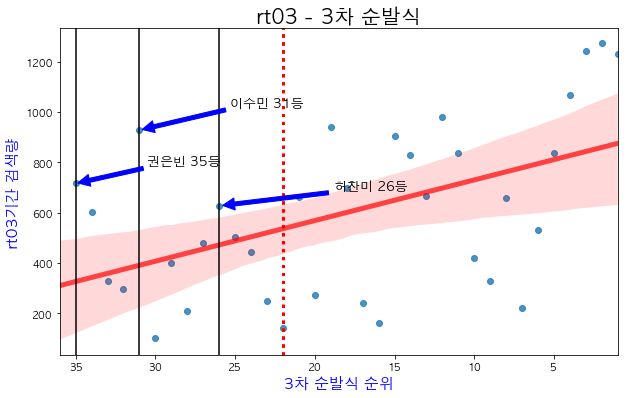

In [138]:
plt.figure(figsize=(10,6))

x = np.arange(1, 100, 20)
plt.xlim(36, 1) 

sns.regplot(x = s1['ep10_rank'] , y = s1['rt03_ratio'], line_kws = {"color":"r","alpha":0.7,"lw":5})


for each in vline:
    name = s1['name'][each]
    rank = str(int(s1['ep10_rank'][each]))
    suffix = '등'
    total = name + ' ' + rank + suffix
    
    plt.axvline(x=s1['ep10_rank'][each], color='black') # ratio 상위 3명 관련 axvline
    plt.annotate(total, xy=(s1['ep10_rank'][each], s1['rt03_ratio'][each]), 
                 xytext=(s1['ep10_rank'][each]*(1.3)-15, s1['rt03_ratio'][each]*(1.1)), size=13, 
                 arrowprops=dict(color='blue', shrink=0.03))
    
    plt.axvline(x = 22, color = 'red', linestyle=':', linewidth= 3) # 2차 순발식 생존 등수
    

plt.title('rt03 - 3차 순발식', fontsize = 20, fontweight = 'bold')
plt.xlabel('3차 순발식 순위', fontsize = 15, color = 'b')
plt.ylabel('rt03기간 검색량', fontsize = 15, color = 'b')

plt.savefig('s1_rt03')
    
    
plt.show()

In [139]:
len(out[out['rt03_ratio'] > 
                     int(s1[s1[
                              'ep10_rank'] == 22 # 생존 마지막 순위
                           ]
                         ['rt03_ratio'].values)
                    ])

12

- 상관분석을 통해 검색 rt03와 3차 순발식에서 생존은 상관이 꽤 높은 것으로 나왔다.
    - 상관계수는 0.49
- 22등의 검색 ratio보다 높지만 생존하지 못한 연습생은 12명인데 그 중 상위 3명을 그래프에 표시했다.

2. Season2

In [140]:
s2 = s2[s2['ep10_rank']<=35] # 2차 순발식 탈락자는 이후 데이터가 없으므로 제외
coef_s2rt03 = np.corrcoef(s2['ep10_rank'], s2['rt03_ratio'])
coef_s2rt03

array([[ 1.        , -0.72885064],
       [-0.72885064,  1.        ]])

In [141]:
out = s2[s2['ep10_rank'] > 20] # 3차 순발식에서 방출된 연습생
vertical_range = out[out['rt03_ratio'] > 
                     int(s2[s2[
                              'ep10_rank'] == 20 # 생존 마지막 순위
                           ]
                         ['rt03_ratio'].values)
                    ].sort_values(by = 'rt03_ratio', ascending = False) # 1명 나왔다.
# 즉, 문 닫고 들어간 연습생보다 ratio가 높지만 탈락한 연습생

vline = [vertical_range.index[0]]

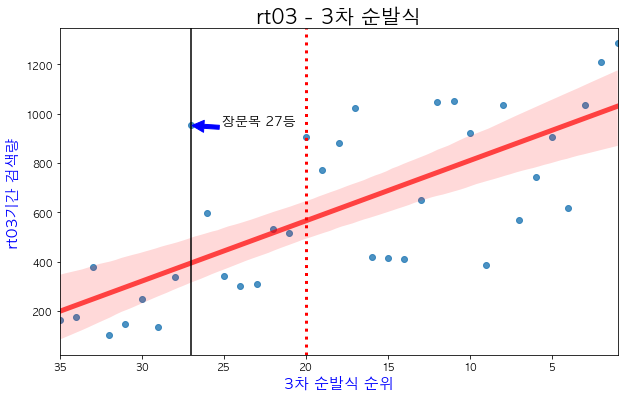

In [144]:
plt.figure(figsize=(10,6))

x = np.arange(1, 100, 20)
plt.xlim(35, 1) 

sns.regplot(x = s2['ep10_rank'] , y = s2['rt03_ratio'], line_kws = {"color":"r","alpha":0.7,"lw":5})


for each in vline:
    name = s2['name'][each]
    rank = str(int(s2['ep10_rank'][each]))
    suffix = '등'
    total = name + ' ' + rank + suffix
    
    plt.axvline(x=s2['ep10_rank'][each], color='black') # ratio 상위 3명 관련 axvline
    plt.annotate(total, xy=(s2['ep10_rank'][each], s2['rt03_ratio'][each]), 
                 xytext=(s2['ep10_rank'][each]*(1.3)-10, s2['rt03_ratio'][each]), size=13, 
                 arrowprops=dict(color='blue', shrink=0.03))
    
    plt.axvline(x = 20, color = 'red', linestyle=':', linewidth= 3) # 2차 순발식 생존 등수
    

plt.title('rt03 - 3차 순발식', fontsize = 20, fontweight = 'bold')
plt.xlabel('3차 순발식 순위', fontsize = 15, color = 'b')
plt.ylabel('rt03기간 검색량', fontsize = 15, color = 'b')

plt.savefig('s2_rt03')
    
plt.show()

In [145]:
len(out[out['rt03_ratio'] > 
                     int(s2[s2[
                              'ep10_rank'] == 20 # 생존 마지막 순위
                           ]
                         ['rt03_ratio'].values)
                    ])

1

- 상관분석을 통해 검색 rt03와 3차 순발식에서 생존은 상관이 매우 높은 것으로 나왔다.
    - 상관계수는 0.72
- 20등의 검색 ratio보다 높지만 생존하지 못한 연습은 1명으로 장문복 연습생이었다.
- 방송 초기부터 장문복 연습생은 많은 관심과 검색량이 있었지만 최종 순위에는 들지 못했다.

## 어떤 기간의 상관계수가 가장 높았을까?

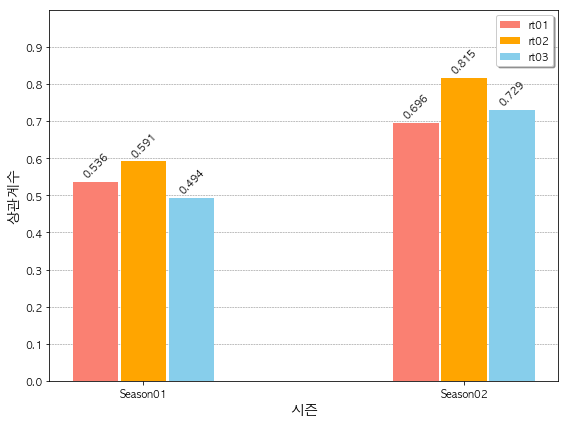

In [29]:
def main() : 
    
    # 1. bar plot으로 나타낼 데이터 입력
    duration = ['rt01','rt02', 'rt03']
    xticks = ['Season01', 'Season02']
    data = {'rt01' : [abs(coef_s1rt01[0][1]),abs(coef_s2rt01[0][1])],
           'rt02' : [abs(coef_s1rt02[0][1]),abs(coef_s2rt02[0][1])],
           'rt03' : [abs(coef_s1rt03[0][1]),abs(coef_s2rt03[0][1])]}
    
    # 2. matplotlib의 figure 및 axis 설정
    fig, ax = plt.subplots(1, 1, figsize = (8, 6)) # 1X1 figure matrix 생성, 가로 9, 세로 7인치 크기 지정
    colors = ['salmon', 'orange', 'skyblue']
    width = 0.15

    # 3. bar 그리기
    for i, rt in enumerate(duration) : 
        pos = compute_pos(xticks, width, i, duration)
        bar = ax.bar(pos, data[rt], width = width*0.95, label = rt, color = colors[i])
        present_height(ax, bar)
        
    # 4. x축 세부설정
    ax.set_xticks(range(len(xticks)))
    ax.set_xticklabels(xticks, fontsize=10)
    ax.set_xlabel('시즌', fontsize = 14)

    
    # 5. y축 세부설정
    ax.set_ylim([0.0, 1.0])
    ax.set_yticks(np.arange(0, 1, 0.1))
    ax.yaxis.set_tick_params(labelsize=10)
    ax.set_ylabel('상관계수', fontsize = 14)
    
    # 6. 범례 나타내기
    ax.legend(loc='upper right', shadow=True, ncol=1)
    
    # 7. 보조선 나타내기
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

    # 8. 그래프 출력
    plt.tight_layout()
    plt.show()
    
def compute_pos(xticks, width, i, duration) : 
    index = np.arange(len(xticks))
    n = len(duration)
    correction = i-0.5*(n-1)
    return index + width*correction

def present_height(ax, bar) : 
    for rect in bar :
        height = rect.get_height()
        posx = rect.get_x() + rect.get_width()*0.5
        posy = height*1.01
        ax.text(posx, posy, '%.3f' % height, rotation = 45, ha = 'center', va = 'bottom')
            
if __name__=='__main__' : 
    main()

두 시즌 모두 rt02에서 상관도가 가장 높게 나왔고 전체적으로 시즌2가 상관이 더 높게 나왔다.

## 결론

- 가설처럼 순발식 전 기간의 검색양과 순발식의 순위는 꽤 상관이 높았고 특히나 시즌 1, 2 모두 2차 순발식에서 가장 높은 상관도를 보여주었다.
- 시즌 1과 시즌 2를 비교하면 시즌 2가 전체적으로 더 높은 상관도를 보이는데 더 많은 대중이 검색에 참여하여 그런 것으로 추측된다.

# 가설 2 검증

2. 검색량 누적 상위 20명을 인기 연습생이라고 정의할 때, 방송 전과 후 인기 연습생은 다를 것이다.<br>
   또한 방송 후 검색량이 방송 전 검색량보다 1차 순발식 순위와 상관이 있을 것이다.(부제 : PD pick 의 진실)

In [67]:
s1 = pd.read_csv('s1_rtTotal.csv', encoding = 'cp949', index_col = 0)
s2 = pd.read_csv('s2_rtTotal.csv', encoding = 'cp949', index_col = 0)

s1_rt01 = pd.read_csv('s1_rt01.csv', encoding = 'cp949', index_col = 0)
s2_rt01 = pd.read_csv('s2_rt01.csv', encoding = 'cp949', index_col = 0)

1. Season 1

- 방송 전 <br>
start : 2016-01-01 / end : 2016-01-21
- 방송 후 <br>
start : 2016-01-22 / end : 2016-02-18

In [68]:
s1_bf = s1_rt01[s1_rt01['date'] < '2016-01-22']
s1_af = s1_rt01[s1_rt01['date'] >= '2016-01-22']

In [69]:
s1_bf_sum = pd.pivot_table(s1_bf, index = ['name'], values = ['ratio'], aggfunc = [np.sum])
s1_bf_sum = s1_bf_sum['sum'].sort_values(by = ['ratio'], ascending = False)
s1_bf_sum = s1_bf_sum.reset_index()

s1_af_sum = pd.pivot_table(s1_af, index = ['name'], values = ['ratio'], aggfunc = [np.sum])
s1_af_sum = s1_af_sum['sum'].sort_values(by = ['ratio'], ascending = False)
s1_af_sum = s1_af_sum.reset_index()

In [70]:
s1_bf_sum['rank_bf'] = s1_bf_sum['ratio'].rank(ascending = False)
s1_af_sum['rank_af'] = s1_af_sum['ratio'].rank(ascending = False)

In [71]:
s1 = pd.merge(s1, s1_bf_sum, on = 'name')
s1 = pd.merge(s1, s1_af_sum, on = 'name')

In [72]:
s1_coef_bf = np.corrcoef(s1['rank_1st_ep5'], s1['rank_bf'])
s1_coef_bf

array([[1.        , 0.35116376],
       [0.35116376, 1.        ]])

In [73]:
s1_coef_af = np.corrcoef(s1['rank_1st_ep5'], s1['rank_af'])
s1_coef_af

array([[1.        , 0.73725517],
       [0.73725517, 1.        ]])

2. Season 2

- 방송 전 <br>
start : 2017-03-10 / end : 2017-04-06
- 방송 후 <br>
start : 2017-04-07 / end : 2017-05-04

In [74]:
s2_bf = s2_rt01[s2_rt01['date'] < '2017-04-06']
s2_af = s2_rt01[s2_rt01['date'] >= '2017-04-06']

In [75]:
s2_bf_sum = pd.pivot_table(s2_bf, index = ['name'], values = ['ratio'], aggfunc = [np.sum])
s2_bf_sum = s2_bf_sum['sum'].sort_values(by = ['ratio'], ascending = False)
s2_bf_sum = s2_bf_sum.reset_index()

s2_af_sum = pd.pivot_table(s2_af, index = ['name'], values = ['ratio'], aggfunc = [np.sum])
s2_af_sum = s2_af_sum['sum'].sort_values(by = ['ratio'], ascending = False)
s2_af_sum = s2_af_sum.reset_index()

In [76]:
s2_bf_sum['rank_bf'] = s2_bf_sum['ratio'].rank(ascending = False)
s2_af_sum['rank_af'] = s2_af_sum['ratio'].rank(ascending = False)

In [77]:
s2 = pd.merge(s2, s2_bf_sum, on = 'name')
s2 = pd.merge(s2, s2_af_sum, on = 'name')

In [78]:
s2_coef_bf = np.corrcoef(s2['rank_1st_ep5'], s2['rank_bf'])
s2_coef_bf

array([[1.        , 0.49091813],
       [0.49091813, 1.        ]])

In [79]:
s2_coef_af = np.corrcoef(s2['rank_1st_ep5'], s2['rank_af'])
s2_coef_af

array([[1.        , 0.80166889],
       [0.80166889, 1.        ]])

## 그래프로 표현하기

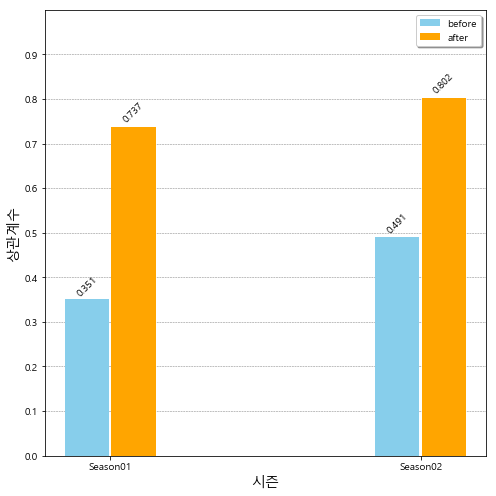

In [80]:
def main() : 

    duration = ['before','after']
    xticks = ['Season01', 'Season02']
    data = {'before' : [s1_coef_bf[0][1],s2_coef_bf[0][1]],
           'after' : [s1_coef_af[0][1],s2_coef_af[0][1]]}
    
    fig, ax = plt.subplots(1, 1, figsize = (7, 7)) # 1X1 figure matrix 생성, 가로 9, 세로 7인치 크기 지정
    colors = ['skyblue', 'orange']
    width = 0.15

    for i, rt in enumerate(duration) : 
        pos = compute_pos(xticks, width, i, duration)
        bar = ax.bar(pos, data[rt], width = width*0.95, label = rt, color = colors[i])
        present_height(ax, bar)
        
    # 4. x축 세부설정
    ax.set_xticks(range(len(xticks)))
    ax.set_xticklabels(xticks, fontsize=10)
    ax.set_xlabel('시즌', fontsize = 14)

    
    # 5. y축 세부설정
    ax.set_ylim([0.0, 1.0])
    ax.set_yticks(np.arange(0, 1, 0.1))
    ax.yaxis.set_tick_params(labelsize=10)
    ax.set_ylabel('상관계수', fontsize = 14)
    
    # 6. 범례 나타내기
    ax.legend(loc='upper right', shadow=True, ncol=1)
    
    # 7. 보조선 나타내기
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

    # 8. 그래프 출력
    plt.tight_layout()
    plt.show()
    
def compute_pos(xticks, width, i, duration) : 
    index = np.arange(len(xticks))
    n = len(duration)
    correction = i-0.5*(n-1)
    return index + width*correction

def present_height(ax, bar) : 
    for rect in bar :
        height = rect.get_height()
        posx = rect.get_x() + rect.get_width()*0.5
        posy = height*1.01
        ax.text(posx, posy, '%.3f' % height, rotation = 45, ha = 'center', va = 'bottom')
            
if __name__=='__main__' : 
    main()

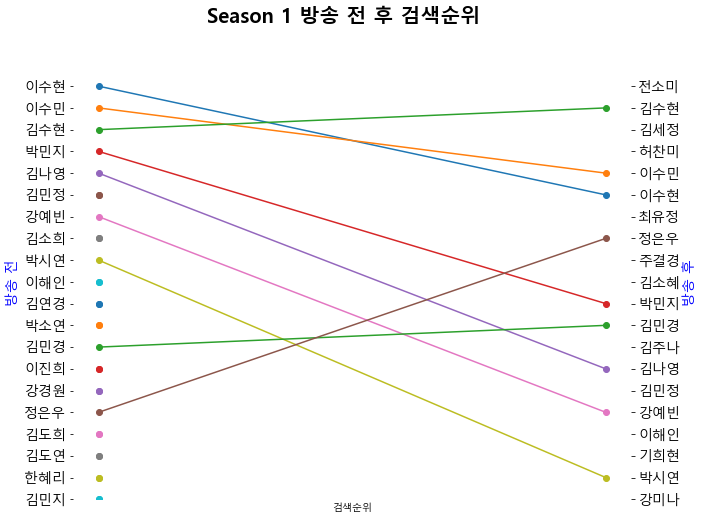

In [81]:
fig = plt.figure(figsize= (10, 8))
ax1 = fig.add_subplot(111)

fig.suptitle('Season 1 방송 전 후 검색순위', fontsize = 20, fontweight = 'bold')
ax1.set_xlabel('검색순위', fontsize = 10)
ax1.set_ylabel('방송 전', color = 'b', fontsize = 14)
ax1.set_yticks(np.arange(1, 21, 1))
ax1.set_ylim([1, 21])
ax1.set_yticklabels(['김민지', '한혜리', '김도연', '김도희', '정은우', '강경원', '이진희', '김민경', '박소연', '김연경',
                     '이해인', '박시연', '김소희', '강예빈', '김민정', '김나영', '박민지', '김수현', '이수민', '이수현'],
                   fontsize = 14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)


ax2 = ax1.twinx()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)


ax2.set_ylabel('방송 후', color = 'b', fontsize = 14)
ax2.set_yticks(np.arange(1, 21, 1))
ax2.set_ylim([1, 21])
ax2.set_yticklabels(['강미나', '박시연', '기희현', '이해인', '강예빈', '김민정', '김나영', '김주나', '김민경', '박민지',
                     '김소혜', '주결경', '정은우', '최유정', '이수현', '이수민', '허찬미', '김세정', '김수현', '전소미'],
                   fontsize = 14)
ax2.spines['right'].set_visible(False)

ax1.plot([0, 1],[20, 15], "o-")
ax1.plot([0, 1],[19, 16], "o-")
ax1.plot([0, 1],[18, 19], "o-")
ax1.plot([0, 1],[17, 10], "o-")
ax1.plot([0, 1],[16, 7], "o-")
ax1.plot([0, 0],[15, 15], "o-")
ax1.plot([0, 1],[14, 5], "o-")
ax1.plot([0, 0],[13, 13], "o-")
ax1.plot([0, 1],[12, 2], "o-")
ax1.plot([0, 0],[11, 11], "o-")
ax1.plot([0, 0],[10, 10], "o-")
ax1.plot([0, 0],[9, 9], "o-")
ax1.plot([0, 1],[8, 9], "o-")
ax1.plot([0, 0],[7, 7], "o-")
ax1.plot([0, 0],[6, 6], "o-")
ax1.plot([0, 1],[5, 13], "o-")
ax1.plot([0, 0],[4, 4], "o-")
ax1.plot([0, 0],[3, 3], "o-")
ax1.plot([0, 0],[2, 2], "o-")
ax1.plot([0, 0],[1, 1], "o-")

plt.xticks([])

plt.savefig('s1_순위')

plt.show()

In [156]:
s2_bf_sum.head(20).sort_values(by = ['ratio'], ascending = True)['name'].values

array(['배진영', '박성우', '강동호', '이의웅', '이우진', '주진우', '김태우', '김현우', '옹성우',
       '김사무엘', '한종연', '주학년', '권현빈', '박지훈', '이유진', '정중지', '이건희', '김동현',
       '장문복', '이대휘'], dtype=object)

In [157]:
s2_af_sum.head(20).sort_values(by = ['ratio'], ascending = True)['name'].values

array(['이의웅', '정중지', '김동현', '하성운', '안형섭', '황민현', '이건희', '박성우', '라이관린',
       '윤지성', '배진영', '정세운', '강다니엘', '옹성우', '주학년', '김사무엘', '권현빈', '박지훈',
       '장문복', '이대휘'], dtype=object)

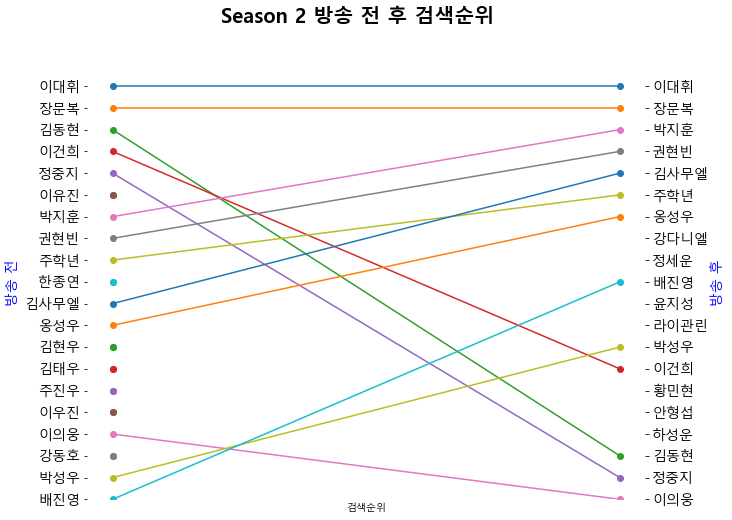

In [82]:
fig = plt.figure(figsize= (10, 8))
ax1 = fig.add_subplot(111)

fig.suptitle('Season 2 방송 전 후 검색순위', fontsize = 20, fontweight = 'bold')
ax1.set_xlabel('검색순위', fontsize = 10)
ax1.set_ylabel('방송 전', color = 'b', fontsize = 14)
ax1.set_yticks(np.arange(1, 21, 1))
ax1.set_ylim([1, 21])
ax1.set_yticklabels(['배진영', '박성우', '강동호', '이의웅', '이우진', '주진우', '김태우', '김현우', '옹성우',
                     '김사무엘', '한종연', '주학년', '권현빈', '박지훈', '이유진', '정중지', '이건희', '김동현',
                     '장문복', '이대휘'],
                   fontsize = 14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)


ax2 = ax1.twinx()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)


ax2.set_ylabel('방송 후', color = 'b', fontsize = 14)
ax2.set_yticks(np.arange(1, 21, 1))
ax2.set_ylim([1, 21])
ax2.set_yticklabels(['이의웅', '정중지', '김동현', '하성운', '안형섭', '황민현', '이건희', '박성우', '라이관린',
                     '윤지성', '배진영', '정세운', '강다니엘', '옹성우', '주학년', '김사무엘', '권현빈', '박지훈',
                     '장문복', '이대휘'],
                   fontsize = 14)
ax2.spines['right'].set_visible(False)

ax1.plot([0, 1],[20, 20], "o-")
ax1.plot([0, 1],[19, 19], "o-")
ax1.plot([0, 1],[18, 3], "o-")
ax1.plot([0, 1],[17, 7], "o-")
ax1.plot([0, 1],[16, 2], "o-")
ax1.plot([0, 0],[15, 15], "o-")
ax1.plot([0, 1],[14, 18], "o-")
ax1.plot([0, 1],[13, 17], "o-")
ax1.plot([0, 1],[12, 15], "o-")
ax1.plot([0, 0],[11, 11], "o-")
ax1.plot([0, 1],[10, 16], "o-")
ax1.plot([0, 1],[9, 14], "o-")
ax1.plot([0, 0],[8, 8], "o-")
ax1.plot([0, 0],[7, 7], "o-")
ax1.plot([0, 0],[6, 6], "o-")
ax1.plot([0, 0],[5, 5], "o-")
ax1.plot([0, 1],[4, 1], "o-")
ax1.plot([0, 0],[3, 3], "o-")
ax1.plot([0, 1],[2, 8], "o-")
ax1.plot([0, 1],[1, 11], "o-")

plt.savefig('s2_순위')

plt.xticks([])

plt.show()

## 결론

- 시즌 1, 2 모두 방송 전보다 후의 검색 순위가 1차 순발식 등수와 더 높은 상관을 보였다.
- 방송 전후 인기 연습생 차이는 그래프에서 확인할 수 있다.
- 시즌 별 차이에 주목해보자면
    - 시즌 1의 경우 방송 이후 인기 연습생에 새로운 이름들이 많이 추가되었고 기존(방송 전)의 인기 연습생의 검색정도는 전체적으로 하락하였다. 
    - 시즌 2의 경우 센터였던 이대휘와 원래 유명했던 장문복은 견고히 공동 1위를 지켰고 기존의 인기 연습생들은 방송 후 오히려 검색량이 늘어 더 상위권에 위치하였다. 